# 动手学深度学习


In [2]:
import torch

x = torch.arange(6)

x.shape

x.reshape(3, -1)

tensor([[0, 1],
        [2, 3],
        [4, 5]])

In [16]:
y = torch.arange(6)
y.reshape(3, -1)

x + y, x - y, x / y, x * y, x**y

(tensor([ 0,  2,  4,  6,  8, 10]),
 tensor([0, 0, 0, 0, 0, 0]),
 tensor([nan, 1., 1., 1., 1., 1.]),
 tensor([ 0,  1,  4,  9, 16, 25]),
 tensor([   1,    1,    4,   27,  256, 3125]))

In [26]:
# 标量
a = torch.tensor(1)

# 向量
b = torch.tensor([1, 2, 3], dtype=torch.float16)

# 矩阵
c = torch.arange(9).reshape(3, -1)

# 张量
d = torch.arange(27).reshape(3, 3, -1)

a, b, c, d, c.sum(), c.sum(dim=1), b.mean(), torch.dot(b, b)

(tensor(1),
 tensor([1., 2., 3.], dtype=torch.float16),
 tensor([[0, 1, 2],
         [3, 4, 5],
         [6, 7, 8]]),
 tensor([[[ 0,  1,  2],
          [ 3,  4,  5],
          [ 6,  7,  8]],
 
         [[ 9, 10, 11],
          [12, 13, 14],
          [15, 16, 17]],
 
         [[18, 19, 20],
          [21, 22, 23],
          [24, 25, 26]]]),
 tensor(36),
 tensor([ 3, 12, 21]),
 tensor(2., dtype=torch.float16),
 tensor(14., dtype=torch.float16))

In [6]:
# 导函数
def f(x):
    return 3 * x**2 - 4 * x


h = 0.1


def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h


for i in range(5):
    print(f"rate={h:.5f},numerical_lim={numerical_lim(f,1,h):.5f}")
    h *= 0.1

rate=0.10000,numerical_lim=2.30000
rate=0.01000,numerical_lim=2.03000
rate=0.00100,numerical_lim=2.00300
rate=0.00010,numerical_lim=2.00030
rate=0.00001,numerical_lim=2.00003


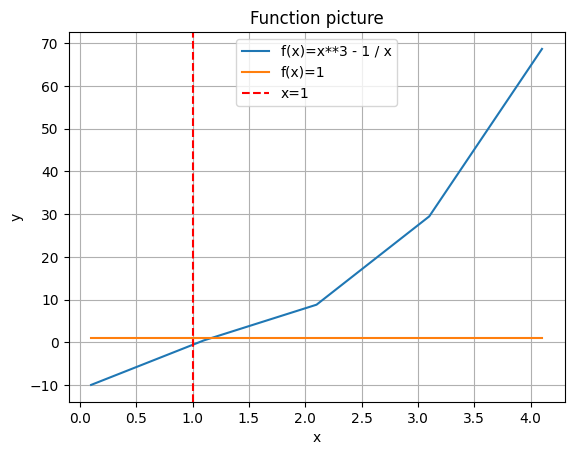

In [20]:
# 用matplotlib画函数图像
import matplotlib.pyplot as plt
import numpy as np


# 函数定义
def myfun1(x):
    return x**3 - 1 / x


def myfun2(x):
    return x / x


# 生成数据
x_data = np.arange(0.1, 5)
y1_data = myfun1(x_data)
y2_data = myfun2(x_data)


# 描绘曲线
plt.plot(x_data, y1_data, label="f(x)=x**3 - 1 / x")
plt.plot(x_data, y2_data, label="f(x)=1")

# 绘制 x=1 的垂直线
plt.axvline(x=1, color="r", linestyle="--", label="x=1")

plt.title("Function picture")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
# 显示图例
plt.legend()

# 显示图像
plt.show()

In [3]:
# 自动微分
import torch

x = torch.arange(4.0)

x.requires_grad_(True)
# 初始为none
print(x.grad)

y = 2 * torch.dot(x, x)
# 向后传播
y.backward()
# 梯度更新
print(x.grad)

# 清除累计梯度
x.grad.zero_()

y = x.sum()

y.backward()

print(x.grad)

None
tensor([ 0.,  4.,  8., 12.])
tensor([1., 1., 1., 1.])


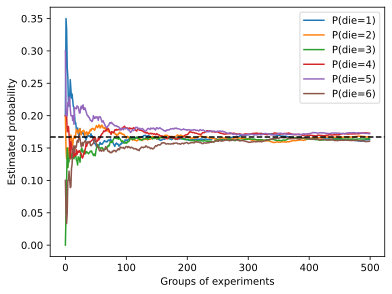

In [4]:
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(10, fair_probs).sample()
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(), label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color="black", linestyle="dashed")
d2l.plt.gca().set_xlabel("Groups of experiments")
d2l.plt.gca().set_ylabel("Estimated probability")
d2l.plt.legend()

In [6]:
print(dir(torch.ones))  # 查看模块属性
print(help(torch.ones))  # 查看用法

['__call__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__name__', '__ne__', '__new__', '__qualname__', '__reduce__', '__reduce_ex__', '__repr__', '__self__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__text_signature__']
Help on built-in function ones in module torch:

ones(...)
    ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
    
    Returns a tensor filled with the scalar value `1`, with the shape defined
    by the variable argument :attr:`size`.
    
    Args:
        size (int...): a sequence of integers defining the shape of the output tensor.
            Can be a variable number of arguments or a collection like a list or tuple.
    
    Keyword arguments:
        out (Tensor, optional): the output tensor.
        dtype (:class:`torch.dtype`, optional):

In [12]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)


def load_array(data_arrays, batch_size, is_train=True):  # @save
    """构造一个PyTorch数据迭代器"""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)


batch_size = 10
data_iter = load_array((features, labels), batch_size)

In [13]:
# nn是神经网络的缩写
from torch import nn

net = nn.Sequential(nn.Linear(2, 1))

loss = nn.MSELoss()
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

In [14]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        trainer.zero_grad()
        l = loss(net(X), y)
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f"epoch {epoch + 1}, loss {l:f}")

epoch 1, loss 0.000270
epoch 2, loss 0.000099
epoch 3, loss 0.000099


In [15]:
w = net[0].weight.data
print("w的估计误差：", true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print("b的估计误差：", true_b - b)

w的估计误差： tensor([0.0001, 0.0003])
b的估计误差： tensor([-0.0003])
